In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# connect to mysql database
import mysql.connector
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="",
    database="halofilkom_db"
)

# make cursor
mycursor = mydb.cursor()

In [14]:
# query
sql = "SELECT * FROM ost_canned_response"
mycursor.execute(sql)

# fetch all data
myresult = mycursor.fetchall()


# import sql result to pandas dataframe
import pandas as pd
df = pd.DataFrame(myresult)
df.drop(columns=[0,1,2,5,6,7,8],inplace=True) #drop kolom yang tidak diperlukan
df.columns = ['topik','jawaban']
df

,topik,jawaban
0,What is osTicket (sample)?,<p>osTicket is a widely-used open source suppo...
1,Sample (with variables),"<p>Hi %{ticket.name.first}, <br /><br /> Your ..."
2,Keuangan - Pengajuan Bantuan Keuangan,<p>Pengajuan Bantuan Keuangan dapat mengisi fo...
3,Keuangan - Pencairan Saldo UKT,<ol><li>Silahkan mengajukan permohonan pencair...
4,keuangan - cek siam untuk tagihan,"<p>Update Tagihan pada SIAM sdra, apabila Besa..."
...,...,...
121,Akademik_Alur Pasca Ujian Skripsi,<p>Panduan mahasiswa telah lulus Ujian Skripsi...
122,Akademik_Mhs Kritis Ujian sblm 21-07-2022 Yudi...,"<p>Terimakasih telah menghubungi HaloFilkom,<b..."
123,Akademik_Ujian Skripsi 2021-2 ; Pendaftaran yu...,"<p>Terimakasih telah menghubungi halofilkom, <..."
124,Akademik_templates DTIF,"<p>Terimakasih telah menghubungi halofilkom,<b..."


In [4]:
jawaban = df.loc[7]['jawaban']

sql = "SELECT thread_id FROM ost_thread_entry where body like '%"+jawaban+"%'"
print(sql)
mycursor.execute(sql)
myresult = mycursor.fetchall()
print(myresult)

SELECT thread_id FROM ost_thread_entry where body like '%<p>Jadwal Bantuan Keuangan Mahasiswa Lama dapat diakses <a href="https://bantuankeuangan.ub.ac.id/">disini</a></p>%'
[]


In [49]:
def findQuestionIndex(text):
    sql = "SELECT thread_id FROM ost_thread_entry where body like '%"+text+"%'"
    mycursor.execute(sql)
    myresult = mycursor.fetchall()
    return myresult

def findFirstQuestionWithIndex(index):
    sql = "SELECT body FROM ost_thread_entry where thread_id = "+str(index)
    mycursor.execute(sql)
    myresult = mycursor.fetchall()
    return myresult[0][0]

In [55]:
tesJawaban = df.loc[8]['jawaban']
tesIndex = findQuestionIndex(tesJawaban)
indexCoba = tesIndex[][0]

print(findFirstQuestionWithIndex(indexCoba))

SyntaxError: '[' was never closed (3037189982.py, line 3)

In [10]:
dfCount = pd.DataFrame()
# add column name
# dfCount.columns = ['topik','count']

for i in range(len(df)):
    try:
        sql = "SELECT thread_id FROM ost_thread_entry where body like '%"+df.loc[i]['jawaban']+"%'"
        mycursor.execute(sql)
        myresult = mycursor.fetchall()

        # add data to dataframe
        dfCount.loc[i,'topik'] = df.loc[i]['topik']
        dfCount.loc[i,'count'] = len(myresult)
    except:
        print("error",sql)

error SELECT thread_id FROM ost_thread_entry where body like '%<p>wa'alaykumussalam<br />Sekedar menginformasikan bahwa nilai Anda adalah B (3.0)<br />Dikarenakan pada semester 2021-2 Anda sudah menempuh 21 sks sedangkan sks MK PKM (KKN) adalah 4 sks, maka Anda bisa entry KRS PKM pada semester berikutnya</p> <p>Terimakasih</p>%'


In [27]:
dfCount.sort_values(by='count',ascending=False).head(29)

,topik,count
8,Keuangan : Tata Cara Pembayaran,110.0
5,Keuangan - Kriteria 50%,48.0
14,Kemahasiswaan - Tahapan pendaftaran Wisuda,35.0
4,keuangan - cek siam untuk tagihan,15.0
117,PSIK : Permasalahan telah diproses (Tiket ditu...,11.0
114,Akademik_KKN 2020,9.0
31,Akademik : Surat Aktif Kuliah,7.0
19,Keuangan - Angsur SAP,7.0
89,Akademik ; Bantuan UKT,5.0
49,Akademik_Pengajuan proposal skripsi di luar ja...,5.0


<AxesSubplot:xlabel='topik'>

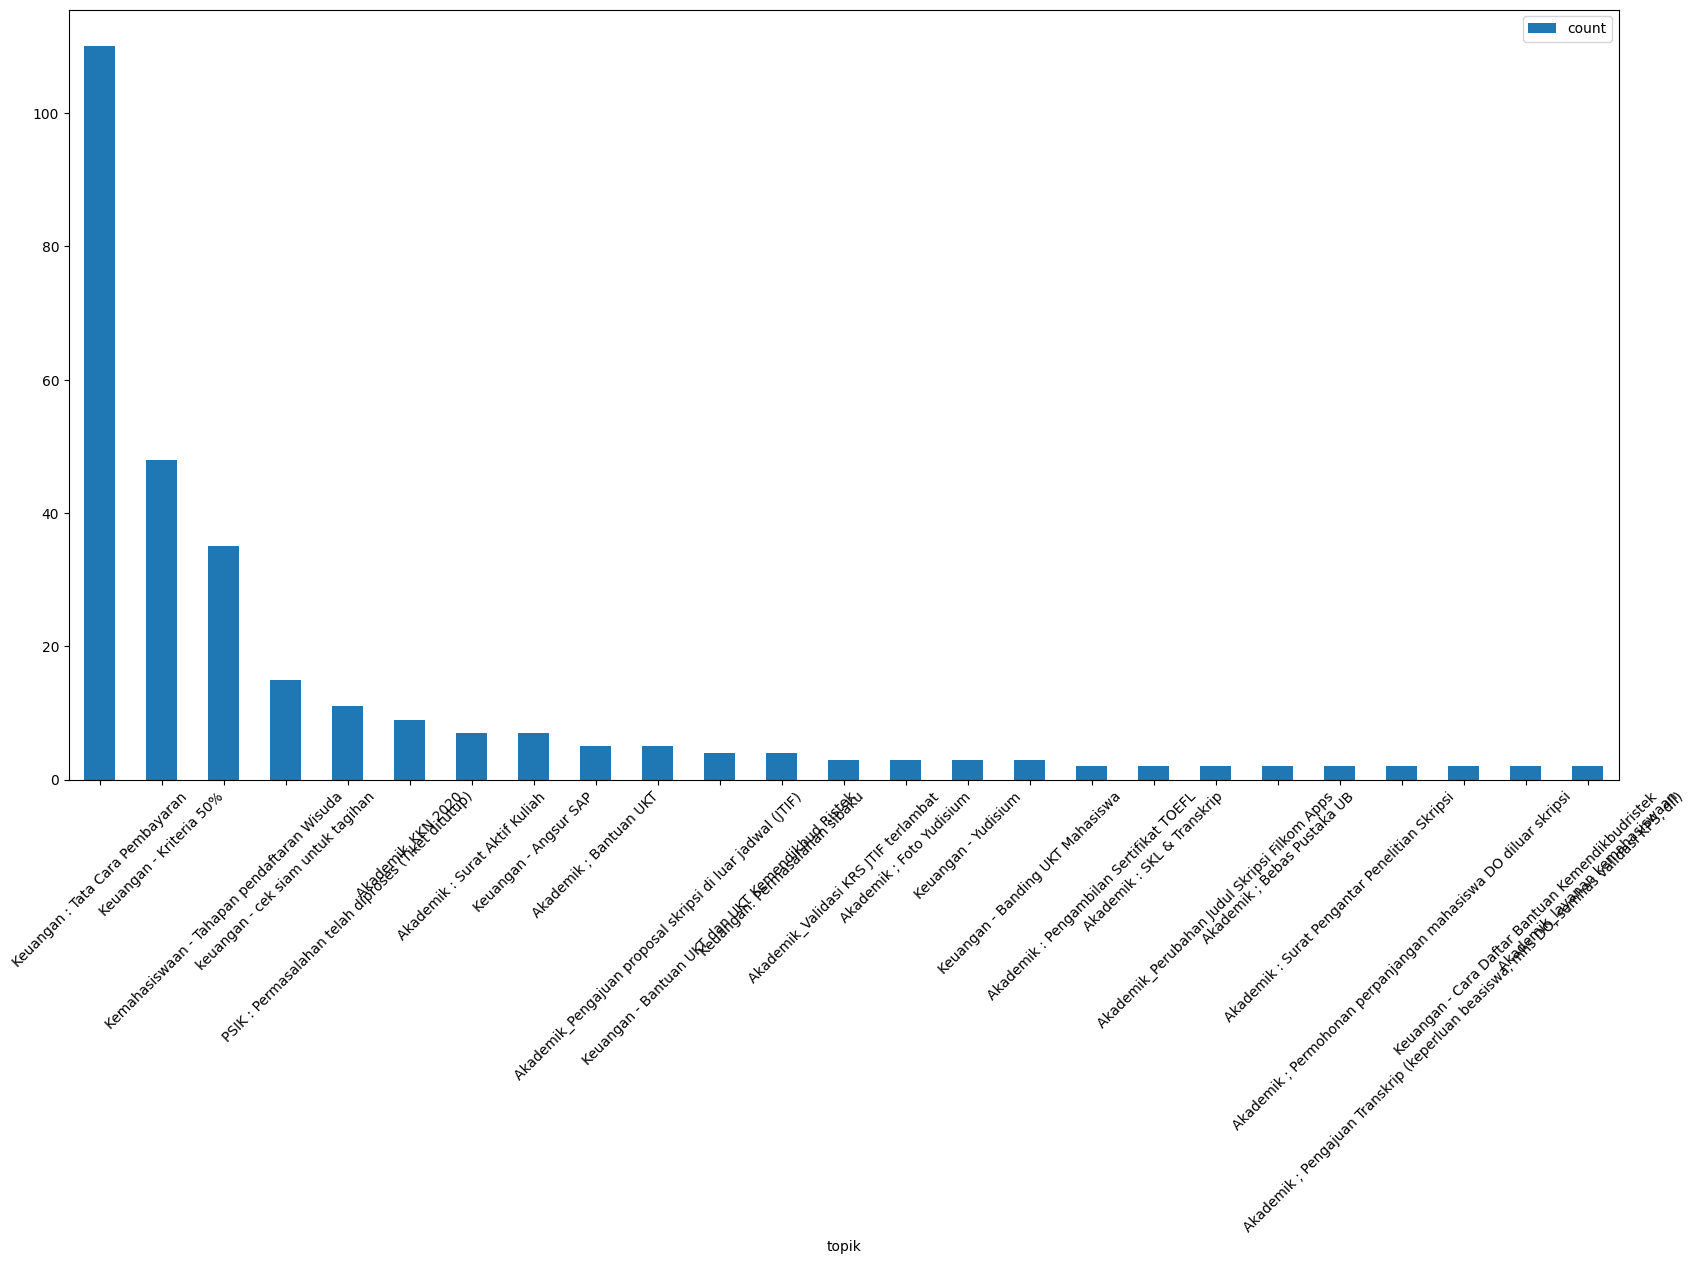

In [28]:
# plot top 25 and annotate
dfCount.sort_values(by='count',ascending=False).head(25).plot(kind='bar',x='topik',y='count',figsize=(20,10), rot=45)

In [ ]:
def cleanTag(text):
    text = text.replace('<p>','').
            replace('</p>','').
            replace('<ol>','').
            replace('</ol>','').
            replace('<li>','').
            replace('</li>','').
            replace('<ul>','').
            replace('</ul>','').
            replace('<br>','').
            replace('br','').
            replace('<strong>','').
            replace('</strong>','').
            replace('<em>','').
            replace('</em>','').
            replace('<a href="','').
            replace('">','').
            replace('</a>','').
            replace('<img src="','').
            replace('" alt="','').
            replace('" />','').
            replace('< />','')
    return text